In [1]:
%matplotlib inline

## Styles

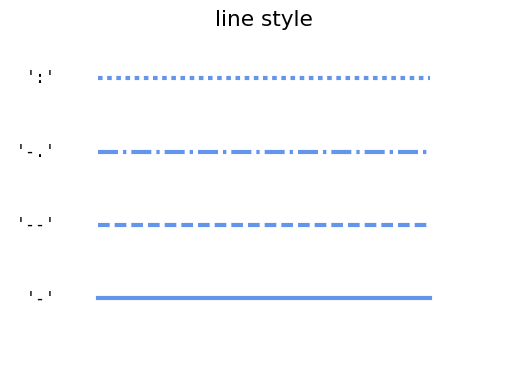

In [2]:
"""
Reference for line-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt

color = 'cornflowerblue'
points = np.ones(5)    # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5,y,nice_repr(linestyle), **text_style)
    #ax.text(-0.5,y,linestyle, **text_style)
    ax.plot(y*points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line style')

plt.show()

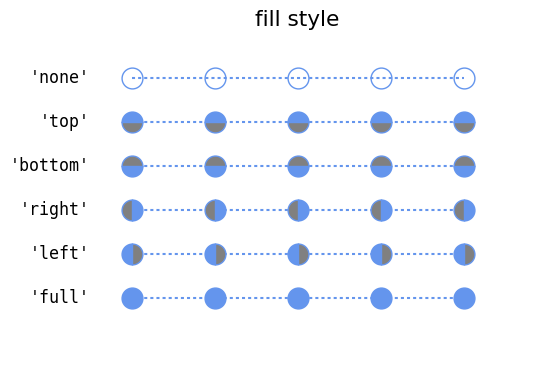

In [3]:
"""
Reference for marker fill-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(5)   # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                   markersize=15, markerfacecoloralt='gray')

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    #print y,y*points
    ax.text(-0.5, y, nice_repr(fill_style), **text_style)
    ax.plot(y*points, fillstyle=fill_style, **marker_style)
    format_axes(ax)
    ax.set_title('fill style')
    
plt.show()

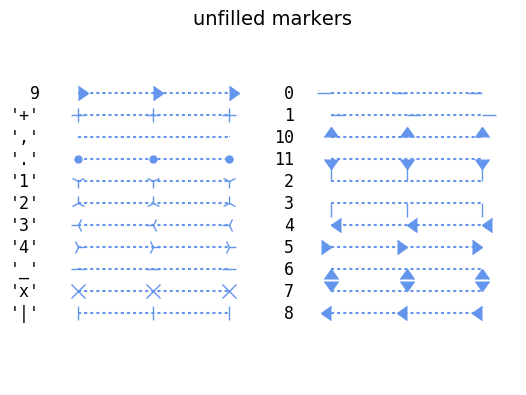

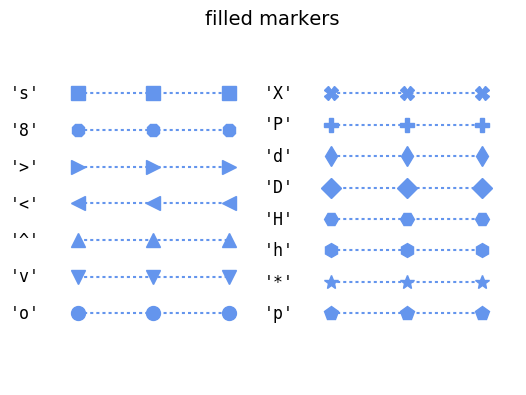

In [4]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""

from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(3)    # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3

unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                   if func != 'nothing' and m not in Line2D.filled_markers]

# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.

unfilled_markers = sorted(unfilled_markers, 
                         key=lambda x: (str(type(x)), str(x)))[::-1]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('unfilled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

### Draw the 2D image in polar coordinate

/home/astrodoo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


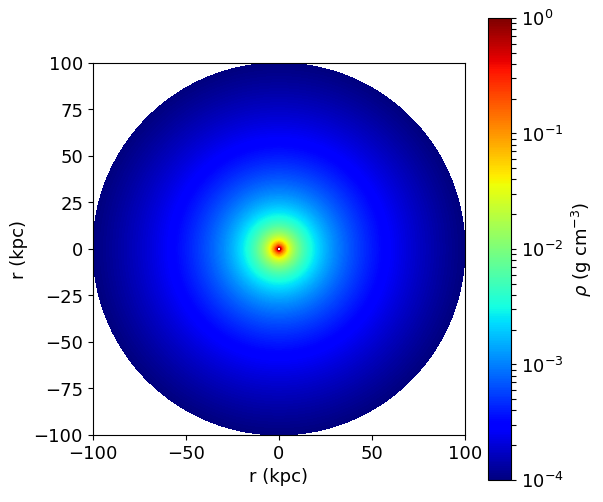

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111,axisbg='white')
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
clb = fig.colorbar(p,ax=ax1,label=r'$\rho$ (g cm$^{-3}$)')
#plt.locator_params(nbins=2)

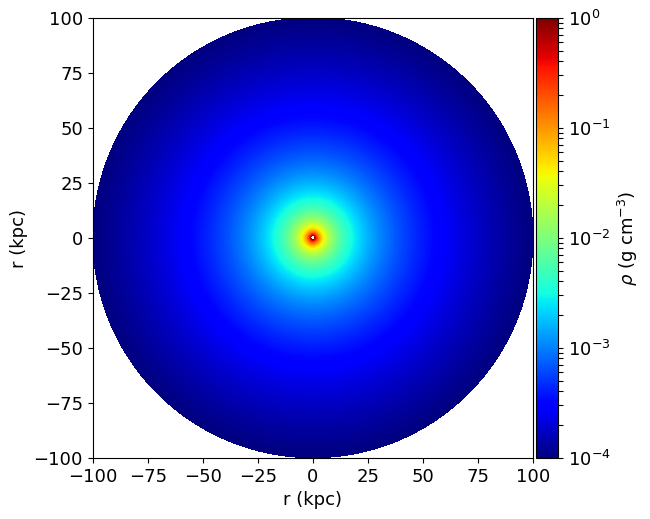

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111,axisbg='white')
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.03)
# colorbar
clb = fig.colorbar(p,ax=ax1,cax=cax1,label=r'$\rho$ (g cm$^{-3}$)')

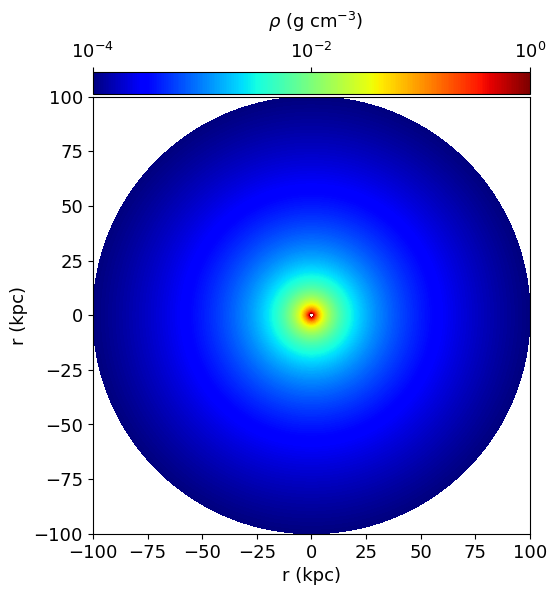

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111,axisbg='white')
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('top', size='5%', pad=0.03)
clb = fig.colorbar(p,ax=ax1,cax=cax1 \
                   ,orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.annotate(r'$\rho$ (g cm$^{-3}$)',(0.4,3.),xycoords='axes fraction')

# set the number of ticks
clb.locator = mpl.ticker.LogLocator(numticks=3)
# if the scale is not log, but normal, it should be
# clb.locator = mpl.ticker.MaxNLocator(nbins=3)
clb.update_ticks()

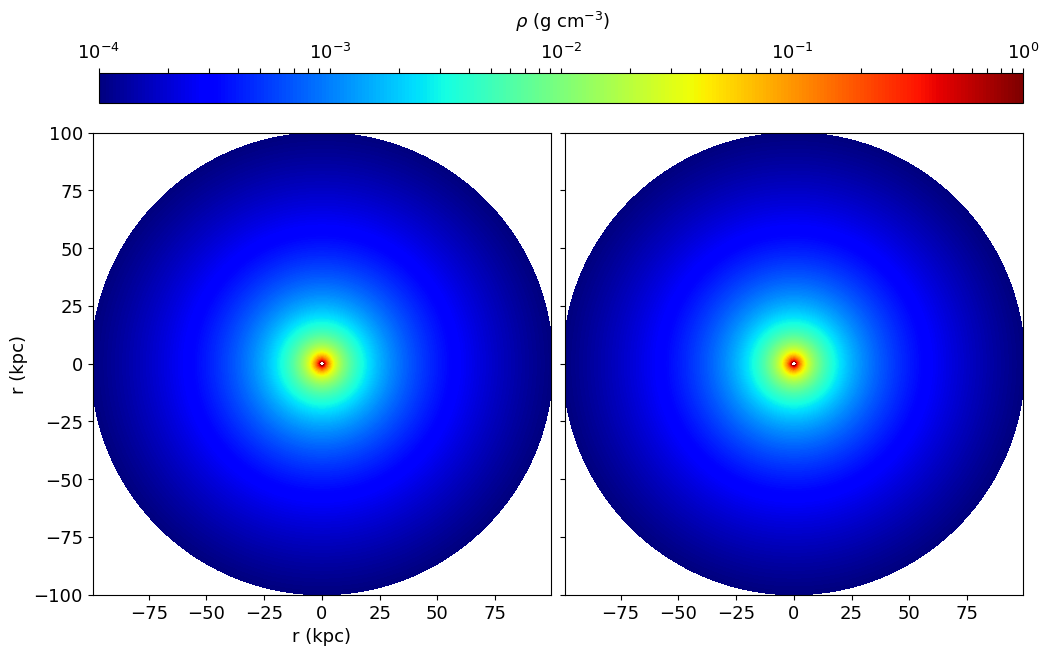

In [8]:
""" Shared axis & colorbar with multiple plots """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

# first plot
ax1 = fig.add_subplot(121,axisbg='white')
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# second plot
ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2.set_aspect('equal')
p = ax2.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

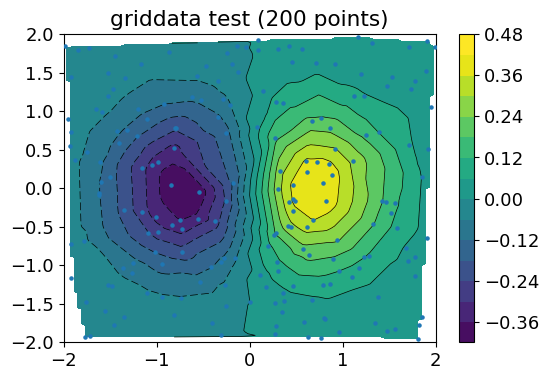

In [9]:
""" Contour non-uniform grid data """

from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()